In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read CSV files and combine them into a Dataframe:
filepath = 'Data/matches.csv'
matches = pd.read_csv(filepath, error_bad_lines=False, low_memory=False)
filepath = 'Data/champs.csv'
champs = pd.read_csv(filepath, error_bad_lines=False, low_memory=False)
filepath = 'Data/participants.csv'
participants = pd.read_csv(filepath, error_bad_lines=False, low_memory=False)
filepath = 'Data/stats1.csv'
stats1 = pd.read_csv(filepath, error_bad_lines=False, low_memory=False)
filepath = 'Data/stats2.csv'
stats2 = pd.read_csv(filepath, error_bad_lines=False, low_memory=False)
stats = stats1.append(stats2)
filepath = 'Data/teamstats.csv'
teamstats = pd.read_csv(filepath, error_bad_lines=False, low_memory=False)

In [2]:

df = pd.merge(participants, stats, how = 'left', on = ['id'], suffixes=('', '_y'))
bluestats = df[df['player'] < 6]
redstats = df[df['player'] > 5]
blueteam = teamstats[teamstats['teamid'] == 100]
redteam = teamstats[teamstats['teamid']== 200]
bluestats = pd.merge(bluestats, blueteam, left_on = 'matchid', right_on = 'matchid', suffixes=('', '_y'))
redstats = pd.merge(redstats, redteam, left_on = 'matchid', right_on = 'matchid', suffixes=('', '_y'))
df = bluestats.append(redstats)
df = pd.merge(df, champs, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('', '_y'))
df = pd.merge(df, matches, how = 'left', left_on = 'matchid', right_on = 'id', suffixes=('', '_y'))
df.head()

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,name,id_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version
0,9,10,1,19,4,11,NONE,JUNGLE,0.0,3748.0,...,Warwick,19,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.0,2301.0,...,Nami,267,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.0,1055.0,...,Draven,119,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
3,12,10,4,114,12,4,SOLO,TOP,0.0,1029.0,...,Fiora,114,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
4,13,10,5,112,4,3,SOLO,MID,0.0,3020.0,...,Viktor,112,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675


In [3]:
# Filter columns:
pd.options.display.max_columns = None
df.columns
df = df[['matchid', 'player', 'name', 'position', 'role', 'win','goldearned', 'visionscore', 'kills', 'deaths', 'assists', 'largestkillingspree', 'largestmultikill', 'longesttimespentliving', 'totdmgdealt', 'totdmgtochamp', 'totdmgtaken', 'turretkills', 'totminionskilled', 'wardsplaced', 'wardskilled', 'duration', 'firstblood', 'seasonid','dragonkills', 'baronkills', 'harrykills', 'inhibkills']]
df.describe()

,matchid,player,win,goldearned,visionscore,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,totdmgdealt,totdmgtochamp,totdmgtaken,turretkills,totminionskilled,wardsplaced,wardskilled,duration,firstblood,seasonid,dragonkills,baronkills,harrykills,inhibkills
count,1.834520e+06,1.834520e+06,1834517.0,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834517e+06,1.834520e+06,1.834517e+06,1.834520e+06,1.834520e+06,1.834520e+06,1.834520e+06,1.834517e+06
mean,9.488531e+04,5.489930e+00,0.5,1.141560e+04,1.383801e+01,5.788830e+00,5.811950e+00,8.317764e+00,2.665733e+00,1.332439e+00,6.306592e+02,1.138370e+05,1.770296e+04,2.319780e+04,9.146457e-01,1.209770e+02,1.148318e+01,1.783263e+00,1.833816e+03,9.925392e-02,7.858258e+00,1.442071e+00,4.148736e-01,2.283022e-01,1.808154e-01
std,5.359679e+04,2.871098e+00,0.5,4.008576e+03,1.739589e+01,4.603964e+00,3.265106e+00,5.923790e+00,2.528242e+00,7.587106e-01,3.110722e+02,1.587346e+06,1.147493e+04,1.185376e+04,1.212035e+00,8.396360e+01,7.545950e+00,2.234868e+00,5.096079e+02,2.990027e-01,6.860198e-01,1.237726e+00,6.084080e-01,4.206984e-01,4.620628e-01
min,1.000000e+01,1.000000e+00,0.0,6.430000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.147484e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+02,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.862775e+04,3.000000e+00,0.0,8.864000e+03,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,4.340000e+02,5.965300e+04,9.411000e+03,1.522600e+04,0.000000e+00,3.900000e+01,7.000000e+00,0.000000e+00,1.542000e+03,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.475950e+04,5.000000e+00,0.0,1.135000e+04,9.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.900000e+02,1.093360e+05,1.555300e+04,2.152200e+04,0.000000e+00,1.250000e+02,1.000000e+01,1.000000e+00,1.838000e+03,0.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.413752e+05,8.000000e+00,1.0,1.393700e+04,2.200000e+01,8.000000e+00,8.000000e+00,1.200000e+01,4.000000e+00,2.000000e+00,7.920000e+02,1.572530e+05,2.365100e+04,2.943000e+04,1.000000e+00,1.860000e+02,1.400000e+01,3.000000e+00,2.145000e+03,0.000000e+00,8.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.875880e+05,1.000000e+01,1.0,4.098200e+04,1.790000e+02,4.500000e+01,3.800000e+01,5.700000e+01,3.500000e+01,6.000000e+00,3.038000e+03,1.064761e+06,1.526070e+05,1.651520e+05,1.000000e+01,6.730000e+02,6.900000e+02,8.600000e+01,4.991000e+03,1.000000e+00,8.000000e+00,7.000000e+00,5.000000e+00,2.000000e+00,7.000000e+00


In [4]:
#cleaning
#only season 8
#Remove games that are under 5 minutes long
print(df.shape)
df = df[df['seasonid'] == 8]
df = df[df['duration'] >= 300]


print(df.shape)
#removed ~ 15000 matches

(1834520, 28)
(1686006, 28)


In [5]:
data = matches[['id', 'seasonid', 'duration']]
data = data[data['seasonid'] == 8]
data = data[data['duration'] >= 300]

blue = df[df['player']<6].groupby('matchid')[['goldearned', 'visionscore']].sum()
blue['dragonkills'] = df[df['player']<6].groupby('matchid')['dragonkills'].max()
blue['baronkills'] = df[df['player']<6].groupby('matchid')['baronkills'].max()
blue['harrykills'] = df[df['player']<6].groupby('matchid')['harrykills'].max()
blue['inhibkills'] = df[df['player']<6].groupby('matchid')['inhibkills'].max()
red = df[df['player']>5].groupby('matchid')[['goldearned', 'visionscore']].sum()
red['dragonkills'] = df[df['player']>5].groupby('matchid')['dragonkills'].max()
red['baronkills'] = df[df['player']>5].groupby('matchid')['baronkills'].max()
red['harrykills'] = df[df['player']>5].groupby('matchid')['harrykills'].max()
red['inhibkills'] = df[df['player']>5].groupby('matchid')['inhibkills'].max()
blue['golddifference'] = blue['goldearned'] - red['goldearned']
blue['visiondifference'] = blue['visionscore'] - red['visionscore']
blue['dragondifference'] = blue['dragonkills'] - red['dragonkills']
blue['barondifference'] = blue['baronkills'] - red['baronkills']
blue['harrydifference'] = blue['harrykills'] - red['harrykills']
blue['inhibdifference'] = blue['inhibkills'] - red['inhibkills']

data = pd.merge(data, blue, how = 'left', left_on = 'id', right_on = 'matchid')
blue = df[df['player']<6].groupby('matchid')['win'].max()
data = pd.merge(data, blue, how = 'left', left_on = 'id', right_on = 'matchid')

data = data[data['visionscore'] != 0]
data = data[data['barondifference'] != 0]
data = data[data['dragondifference'] != 0]
data = data[data['harrydifference'] != 0]
data = data[data['visionscore'] != data['visiondifference']]
del data['seasonid']
data = data[['id','duration','golddifference', 'visiondifference', 'dragondifference', 'barondifference', 'harrydifference', 'inhibdifference', 'win']]
data.head()

,id,duration,golddifference,visiondifference,dragondifference,barondifference,harrydifference,inhibdifference,win
0,10,1909,-12391.0,-48.0,-3.0,-1.0,-1.0,-2.0,0.0
4,14,2067,-5515.0,-31.0,-3.0,-1.0,1.0,0.0,0.0
6,16,1589,-9411.0,-57.0,-3.0,-1.0,-1.0,-1.0,0.0
15,25,2329,11139.0,-5.0,-1.0,2.0,-1.0,2.0,1.0
16,26,2045,7386.0,56.0,-1.0,1.0,-1.0,1.0,1.0


<AxesSubplot:xlabel='golddifference', ylabel='visiondifference'>

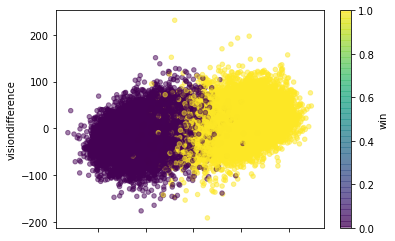

In [6]:
data.plot.scatter(x="golddifference", y="visiondifference", c='win', colormap='viridis', alpha=0.5)

<AxesSubplot:>

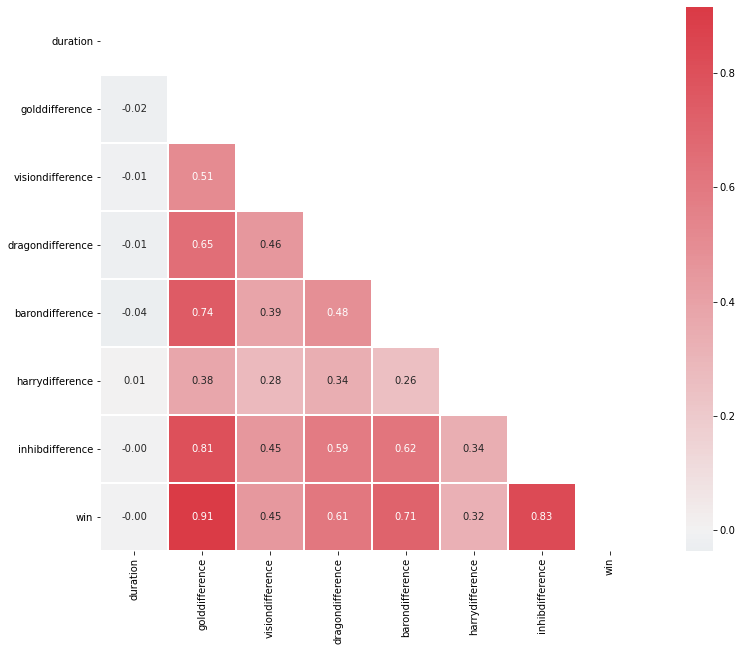

In [7]:
#correlation between factors 2
data_corr = data._get_numeric_data()
del data_corr['id']

corr = data_corr.corr()
plt.figure(figsize=(15,10))
ax= plt.subplot()
mask = np.zeros_like(data_corr.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(corr, ax=ax, annot=True,square=True, linewidths=.5, center = 0, mask = mask, cmap=cmap, fmt = '.2f')


In [8]:
#let's look if there is a big difference with long or short game
#long
data_l = data._get_numeric_data()
data_l = data_l[data_l['duration'] >= 1500]
del data_l['id']
#short
data_s = data._get_numeric_data()
data_s = data_s[data_s['duration'] < 1500]
del data_s['id']

<AxesSubplot:xlabel='golddifference', ylabel='visiondifference'>

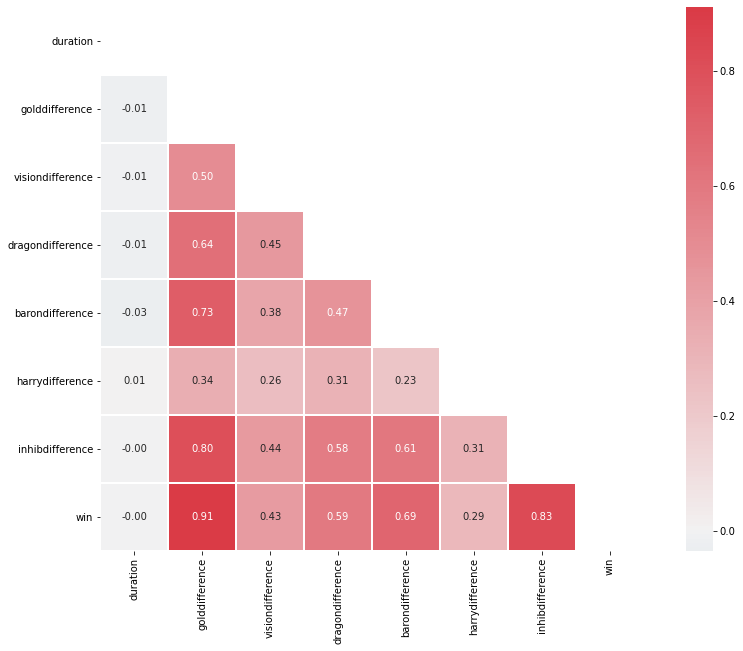

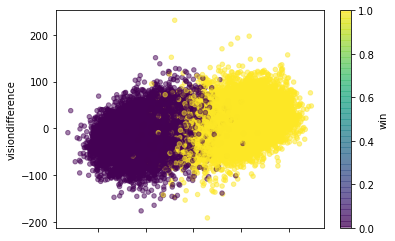

In [9]:
#correlation for long games

data_l_corr = data_l._get_numeric_data()

corr = data_l_corr.corr()
plt.figure(figsize=(15,10))
ax= plt.subplot()
mask = np.zeros_like(data_l_corr.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(corr, ax=ax, annot=True,square=True, linewidths=.5, center = 0, mask = mask, cmap=cmap, fmt = '.2f')


data_l.plot.scatter(x="golddifference", y="visiondifference", c='win', colormap='viridis', alpha=0.5)

<AxesSubplot:xlabel='golddifference', ylabel='visiondifference'>

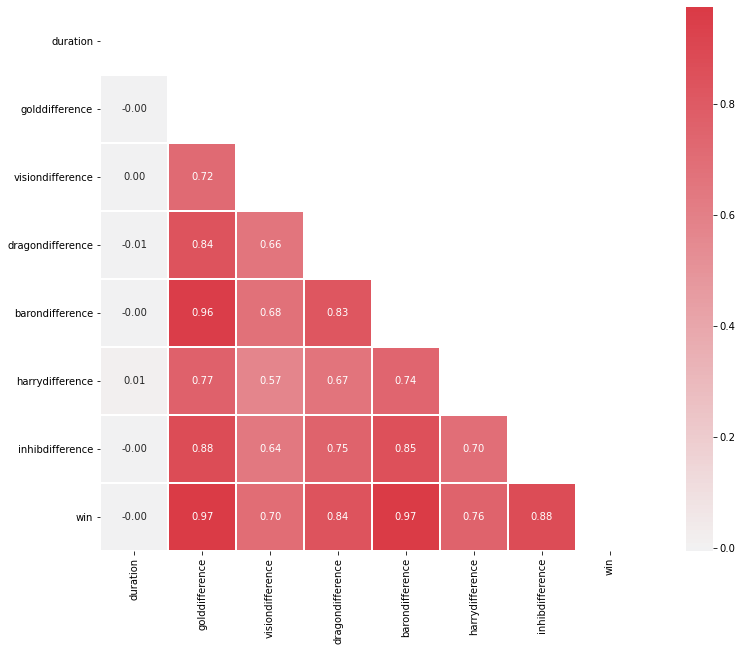

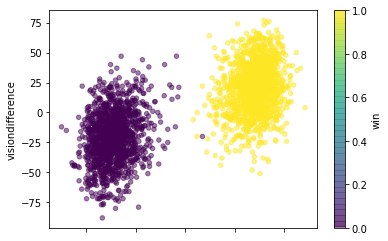

In [10]:
#correlation for short games

data_s_corr = data_s._get_numeric_data()

corr = data_s_corr.corr()
plt.figure(figsize=(15,10))
ax= plt.subplot()
mask = np.zeros_like(data_s_corr.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(corr, ax=ax, annot=True,square=True, linewidths=.5, center = 0, mask = mask, cmap=cmap, fmt = '.2f')


data_s.plot.scatter(x="golddifference", y="visiondifference", c='win', colormap='viridis', alpha=0.5)


In [11]:
midMatch = pd.read_csv("Data/estimate3.zip")
del midMatch["Unnamed: 0"]
midMatch["blueVisionDiff"] = midMatch["blueVisionEstimate"] - midMatch["redVisionEstimate"]
midMatch.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueVisionEstimate,redVisionEstimate,blueVisionDiff
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7,23.163834,29.919363,-6.755529
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0,14.445889,14.445889,0.000000
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5,16.732970,22.559713,-5.826743
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8,13.829118,20.169977,-6.340859
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4,20.740816,22.671938,-1.931122


<AxesSubplot:xlabel='blueGoldDiff', ylabel='blueVisionDiff'>

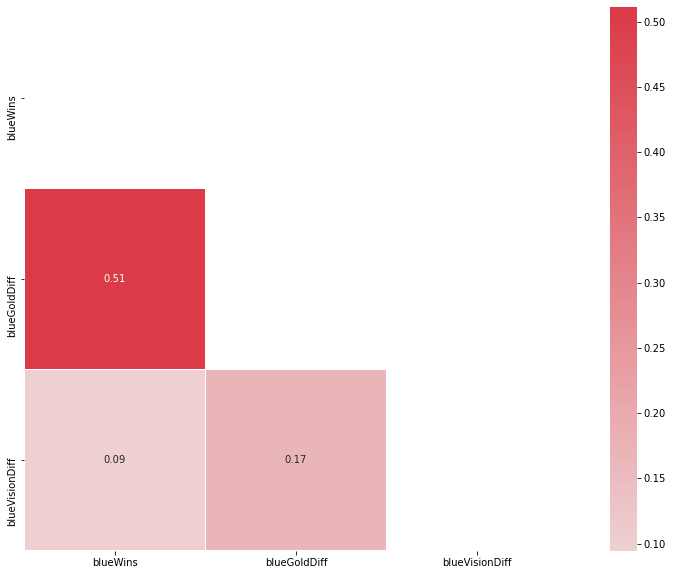

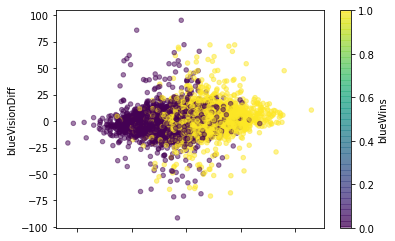

In [12]:
midMatchCorr = midMatch[["blueWins", "blueGoldDiff", "blueVisionDiff"]]._get_numeric_data()

corr = midMatchCorr.corr()
plt.figure(figsize=(15,10))
ax= plt.subplot()
mask = np.zeros_like(midMatchCorr.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

sns.heatmap(corr, ax=ax, annot=True,square=True, linewidths=.5, center = 0, mask = mask, cmap=cmap, fmt = '.2f')


midMatchCorr.plot.scatter(x="blueGoldDiff", y="blueVisionDiff", c='blueWins', colormap='viridis', alpha=0.5)